<a href="https://colab.research.google.com/github/pshinde612/Team-Unhealthy-Jackets/blob/main/Final_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
forest_area = pd.read_csv('https://raw.githubusercontent.com/pshinde612/Team-Unhealthy-Jackets/main/Forest_Area_ShareOf_Total_Area.csv')
# malaria_species = pd.read_csv('https://raw.githubusercontent.com/pshinde612/Team-Unhealthy-Jackets/main/Malaria_Invasive_Species.csv')
malaria_atlas = pd.read_csv('https://raw.github.com/pshinde612/Team-Unhealthy-Jackets/main/MalariaAtlas_Data_Vectors_1990-2009.csv')
corn_price = pd.read_csv("https://raw.githubusercontent.com/pshinde612/Team-Unhealthy-Jackets/main/cornpricesglobalimf.csv")
malaria_big_pv = pd.read_csv("https://raw.githubusercontent.com/pshinde612/Team-Unhealthy-Jackets/main/MALARIA_2000_2019_PV_ADMIN2_ALL_AGES.CSV")
malaria_big_pf = pd.read_csv("https://raw.githubusercontent.com/pshinde612/Team-Unhealthy-Jackets/main/MALARIA_2000_2019_PF_ADMIN2_ALL_AGES.CSV")
temperature_anomaly = pd.read_csv("https://raw.githubusercontent.com/pshinde612/Team-Unhealthy-Jackets/main/temperature_anomaly.csv")

In [ ]:
world = forest_area[forest_area.Entity == 'World']
asia = forest_area[forest_area.Entity == 'Asia']
africa = forest_area[forest_area.Entity == 'Africa']
noram = forest_area[forest_area.Entity == 'Northern America']
southam = forest_area[forest_area.Entity == 'South America']

In [ ]:
world = world[world["Year"] < 2010]

In [ ]:
# forest_area_India = forest_area[forest_area.Entity == 'India']
# forest_area_India

In [ ]:
# malaria_species.columns
malaria_atlas.columns

Index(['FID', 'id', 'site_id', 'latitude', 'longitude', 'country_id',
       'month_start', 'year_start', 'month_end', 'year_end', 'species',
       'id_method1', 'id_method2', 'sample_method1', 'sample_method2',
       'sample_method3', 'sample_method4', 'assi', 'citation'],
      dtype='object')

In [ ]:
# malaria_species_cleaned = malaria_species.drop(['LATITUDE', 'LONGITUDE', 'STAGE', 'SAMPLING_METHOD', 'CITATION', 'CITATION_URL', 'DATA_CURATOR'], axis=1)
# malaria_species_cleaned = malaria_species_cleaned.sort_values('YEAR_START', axis=0, ascending=True)
# malaria_species_cleaned = malaria_species_cleaned.drop(['ID_METHOD', 'INVASIVE_STATUS', 'BREEDING_HABITAT'], axis=1)
# malaria_species_cleaned

In [ ]:
malaria_atlas_cleaned = malaria_atlas.drop(['FID', 'id', 'site_id', 'latitude', 'longitude', 'id_method1', 'id_method2', 'sample_method1', 'sample_method2', 'sample_method3', 'sample_method4', 'assi', 'citation' ], axis=1)
malaria_atlas_cleaned = malaria_atlas_cleaned.sort_values('year_start', axis=0, ascending=True)
malaria_atlas_cleaned = malaria_atlas_cleaned.dropna()
malaria_atlas_cleaned

,country_id,month_start,year_start,month_end,year_end,species
24159,PAN,1.0,1970.0,12.0,2005.0,"Anopheles albimanus Wiedemann, 1820"
24178,PAN,1.0,1970.0,12.0,2005.0,"Anopheles albimanus Wiedemann, 1820"
24179,PAN,1.0,1970.0,12.0,2005.0,"Anopheles albimanus Wiedemann, 1820"
24180,PAN,1.0,1970.0,12.0,2005.0,"Anopheles albimanus Wiedemann, 1820"
24181,PAN,1.0,1970.0,12.0,2005.0,"Anopheles albimanus Wiedemann, 1820"
...,...,...,...,...,...,...
24800,UGA,4.0,2008.0,5.0,2008.0,"Anopheles gambiae Giles, 1902"
21162,KEN,2.0,2008.0,4.0,2008.0,"Anopheles gambiae Giles, 1902"
21082,KEN,2.0,2008.0,4.0,2008.0,"Anopheles funestus Giles, 1900"
24802,MLI,8.0,2009.0,8.0,2009.0,"Anopheles coluzzii, Coetzee & Wilkerson, 2013"


In [ ]:
# change malaria_species_cleaned to atlas
malaria_atlas_cleaned.year_start.unique()

array([1970., 1974., 1975., 1980., 1981., 1982., 1983., 1984., 1985.,
       1986., 1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994.,
       1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003.,
       2004., 2005., 2006., 2007., 2008., 2009.])

In [ ]:
malaria_atlas_cleaned.country_id.unique()

array(['PAN', 'CRI', 'NGA', 'CHN', 'ZWE', 'BRA', 'TZA', 'BDI', 'SEN',
       'SUR', 'IND', 'THA', 'PNG', 'SWE', 'COL', 'BFA', 'IRN', 'ZAF',
       'KEN', 'USA', 'MEX', 'MYS', 'MMR', 'LKA', 'SDN', 'SSD', 'MLI',
       'GBR', 'IRQ', 'COM', 'COG', 'CMR', 'SLB', 'BGD', 'VUT', 'PER',
       'AUS', 'BEN', 'PHL', 'GMB', 'HTI', 'MDG', 'IDN', 'VEN', 'NPL',
       'ERI', 'EGY', 'JPN', 'KHM', 'DOM', 'ETH', 'BWA', 'YEM', 'COD',
       'TTO', 'GIN', 'MOZ', 'RUS', 'PAK', 'BOL', 'BLZ', 'CUB', 'GUF',
       'GTM', 'SLE', 'GNQ', 'GNB', 'SWZ', 'CIV', 'MAC', 'MWI', 'ECU',
       'UGA', 'GRD', 'ISR', 'ITA', 'ARG', 'PRY', 'NER', 'NAM', 'GAB',
       'VNM', 'SAU', 'GHA', 'NIC', 'FRA', 'REU', 'SGP', 'JOR', 'PRK',
       'KOR', 'LAO', 'STP', 'GRC', 'AZE', 'ARM', 'TUR', 'SLV', 'AFG',
       'NLD', 'GUY', 'ROU', 'TLS', 'AGO', 'ESP', 'SOM', 'ZMB', 'MAR',
       'TCD', 'TJK', 'UZB'], dtype=object)

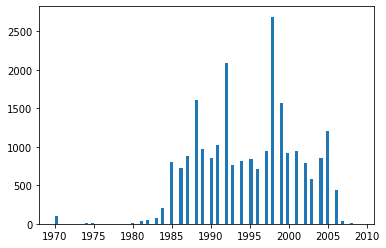

In [ ]:
#changed malaria_species_cleaned to atlas
plt.hist(malaria_atlas_cleaned['year_start'], bins=100)
plt.show()

In [ ]:
# malaria_species_cleaned.VECTOR_SPECIES.unique()
malaria_atlas_cleaned.species.unique()

array(['Anopheles albimanus Wiedemann, 1820',
       'Anopheles pseudopunctipennis species complex',
       'Anopheles aquasalis Curry, 1932',
       'Anopheles albitarsis species complex',
       'Anopheles gambiae Giles 1902 / Anopheles coluzzii Coetzee & Wilkerson 2013',
       'Anopheles arabiensis Patton, 1905',
       'Anopheles sinensis species complex',
       'Anopheles funestus Giles, 1900', 'Anopheles darlingi Root, 1926',
       'Anopheles nuneztovari species complex',
       'Anopheles gambiae Giles, 1902', 'Anopheles merus Dönitz, 1902',
       'Anopheles melas Theobald, 1903',
       'Anopheles subpictus species complex',
       'Anopheles aconitus Dönitz, 1902',
       'Anopheles barbirostris species complex',
       'Anopheles dirus species complex',
       'Anopheles annularis van der Wulp, 1884',
       'Anopheles maculatus Group', 'Anopheles minimus species complex',
       'Anopheles punctulatus species complex',
       'Anopheles farauti species complex',
       '

In [ ]:
# malaria_species_cleaned.VECTOR_SPECIES_COMPLEX.unique()
# no counterpart column so commented malaria_atlas_cleaned.VECTOR_SPECIES_COMPLEX.unique()

Pre-processing anothe dataset of corn prices and see how that can relate to the malaria atlas species.

In [ ]:
y = malaria_atlas_cleaned.groupby(['year_start']).size()
# y.index > 1989
y = y.loc[y.index > 1989]
print(y)
# y is the dependent variable

year_start
1990.0     855
1991.0    1026
1992.0    2092
1993.0     768
1994.0     820
1995.0     846
1996.0     709
1997.0     943
1998.0    2688
1999.0    1562
2000.0     925
2001.0     941
2002.0     788
2003.0     587
2004.0     851
2005.0    1205
2006.0     436
2007.0      35
2008.0      12
2009.0       2
dtype: int64


In [ ]:
# y = y.to_frame()
y

year_start
1990.0     855
1991.0    1026
1992.0    2092
1993.0     768
1994.0     820
1995.0     846
1996.0     709
1997.0     943
1998.0    2688
1999.0    1562
2000.0     925
2001.0     941
2002.0     788
2003.0     587
2004.0     851
2005.0    1205
2006.0     436
2007.0      35
2008.0      12
2009.0       2
dtype: int64

In [ ]:
world["Malaria"] = y
world

,Entity,Code,Year,Forest cover,Malaria
7850,World,OWID_WRL,1990,32.518625,NaN
7851,World,OWID_WRL,1991,32.458458,NaN
7852,World,OWID_WRL,1992,32.398291,NaN
7853,World,OWID_WRL,1993,32.338124,NaN
7854,World,OWID_WRL,1994,32.277957,NaN
7855,World,OWID_WRL,1995,32.217790,NaN
7856,World,OWID_WRL,1996,32.157623,NaN
7857,World,OWID_WRL,1997,32.097456,NaN
7858,World,OWID_WRL,1998,32.037289,NaN
7859,World,OWID_WRL,1999,31.977122,NaN


In [ ]:
world["Malaria"].iloc[0] = y.iloc[0]
for x in range(0,20):
  world["Malaria"].iloc[x] = y.iloc[x]
world = world.drop(["Code"],axis=1)
world

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Entity,Year,Forest cover,Malaria
7850,World,1990,32.518625,855.0
7851,World,1991,32.458458,1026.0
7852,World,1992,32.398291,2092.0
7853,World,1993,32.338124,768.0
7854,World,1994,32.277957,820.0
7855,World,1995,32.217790,846.0
7856,World,1996,32.157623,709.0
7857,World,1997,32.097456,943.0
7858,World,1998,32.037289,2688.0
7859,World,1999,31.977122,1562.0


In [ ]:
corn_price['Year'] = pd.to_datetime(corn_price['DATE']).dt.year
corn_price = corn_price[corn_price["Year"] < 2010]
corn_price = corn_price.groupby(['Year']).mean()
corn_price

,PMAIZMTUSDQ
Year,
1990,109.279606
1991,107.472829
1992,104.212808
1993,102.039965
1994,107.778190
1995,123.451316
1996,164.522941
1997,117.172417
1998,101.617841


In [ ]:
corn_price = corn_price.rename({'PMAIZMTUSDQ': 'Price'}, axis=1)
corn_price_average = corn_price['Price'].mean()
corn_price['Price'] = corn_price['Price']/corn_price_average
corn_price

,Price
Year,
1990,0.912604
1991,0.897515
1992,0.870290
1993,0.852145
1994,0.900065
1995,1.030953
1996,1.373946
1997,0.978517
1998,0.848620


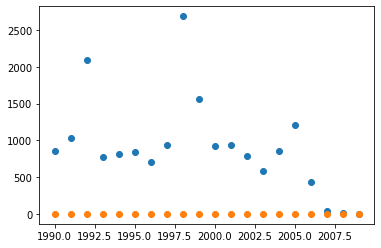

In [ ]:
plt.scatter(corn_price.index, y)
plt.scatter(corn_price.index, corn_price['Price'])

In [ ]:
final_data = world
final_data["Corn_Price"] = corn_price['Price']
for x in range(0,20):
  final_data["Corn_Price"].iloc[x] = corn_price['Price'].iloc[x]
final_data

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Entity,Year,Forest cover,Malaria,Corn_Price
7850,World,1990,32.518625,855.0,0.912604
7851,World,1991,32.458458,1026.0,0.897515
7852,World,1992,32.398291,2092.0,0.870290
7853,World,1993,32.338124,768.0,0.852145
7854,World,1994,32.277957,820.0,0.900065
7855,World,1995,32.217790,846.0,1.030953
7856,World,1996,32.157623,709.0,1.373946
7857,World,1997,32.097456,943.0,0.978517
7858,World,1998,32.037289,2688.0,0.848620
7859,World,1999,31.977122,1562.0,0.754054


In [ ]:
temperature_anomaly = temperature_anomaly[temperature_anomaly["Year"] > 1989]
temperature_anomaly = temperature_anomaly[temperature_anomaly["Year"] < 2010]
temperature_anomaly

,Year,No_Smooting
5,1990,0.45
6,1991,0.40
7,1992,0.22
8,1993,0.23
9,1994,0.32
10,1995,0.45
11,1996,0.33
12,1997,0.46
13,1998,0.61
14,1999,0.38


In [ ]:
final_data["Temperature Anomaly"] = temperature_anomaly["No_Smooting"]
for x in range(0,20):
  final_data["Temperature Anomaly"].iloc[x] = temperature_anomaly['No_Smooting'].iloc[x]

final_data.reset_index(drop=True, inplace=True)
final_data = final_data.drop(columns='Entity')
final_data

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Year,Forest cover,Malaria,Corn_Price,Temperature Anomaly
0,1990,32.518625,855.0,0.912604,0.45
1,1991,32.458458,1026.0,0.897515,0.40
2,1992,32.398291,2092.0,0.870290,0.22
3,1993,32.338124,768.0,0.852145,0.23
4,1994,32.277957,820.0,0.900065,0.32
5,1995,32.217790,846.0,1.030953,0.45
6,1996,32.157623,709.0,1.373946,0.33
7,1997,32.097456,943.0,0.978517,0.46
8,1998,32.037289,2688.0,0.848620,0.61
9,1999,31.977122,1562.0,0.754054,0.38


In [ ]:
final_data = final_data.drop(columns='Year')
final_data

,Forest cover,Malaria,Corn_Price,Temperature Anomaly
0,32.518625,855.0,0.912604,0.45
1,32.458458,1026.0,0.897515,0.40
2,32.398291,2092.0,0.870290,0.22
3,32.338124,768.0,0.852145,0.23
4,32.277957,820.0,0.900065,0.32
5,32.217790,846.0,1.030953,0.45
6,32.157623,709.0,1.373946,0.33
7,32.097456,943.0,0.978517,0.46
8,32.037289,2688.0,0.848620,0.61
9,31.977122,1562.0,0.754054,0.38


In [ ]:
#Splitting data into train and test sets
from sklearn.model_selection import train_test_split

# X: everything but Malaria, y: Malaria
X = final_data.drop(columns = ['Malaria']) 
y = final_data['Malaria'] 

# train test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True)

print('Training set shape: ', X_train.shape)
print('Testing set shape: ', X_test.shape)


Training set shape:  (14, 3)
Testing set shape:  (6, 3)


In [ ]:
# Standard Scale the data such that each column has mean 0 and variance 1
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [ ]:
#Training & testing the model  

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)


In [ ]:
# Calculating accuracy of model
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error {}".format(mse))


Mean Squared Error 293973.9243689682


In [ ]:
# Trying SVM model
from sklearn.svm import SVC

SVM=SVC(kernel = 'linear')
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)

print('Training accuracy of SVM: ', SVM.score(X_train, y_train))
print('Testing accuracy of SVM: ', SVM.score(X_test, y_test))

print(accuracy_score(y_test, y_pred))

Training accuracy of SVM:  1.0
Testing accuracy of SVM:  0.0
0.0


In [ ]:
# Trying Logistic Regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(accuracy_score(y_test, y_pred))
mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error {}".format(mse))

0.0
Mean Squared Error 397223.3333333333


In [ ]:
#Splitting data into train and test sets
from sklearn.model_selection import train_test_split

# X: everything but Malaria, y: Malaria
X = final_data.drop(columns = ['Corn_Price']) 
y = final_data['Corn_Price'] 

# train test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True)

print('Training set shape: ', X_train.shape)
print('Testing set shape: ', X_test.shape)


Training set shape:  (14, 3)
Testing set shape:  (6, 3)


In [ ]:
# Standard Scale the data such that each column has mean 0 and variance 1
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [ ]:
#Training & testing the model  

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)


In [ ]:
# Calculating accuracy of model
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error {}".format(mse))


Mean Squared Error 0.18413587715244548


In [ ]:
# Trying SVM model
from sklearn.svm import SVR


SVM=SVR(kernel = 'linear')
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error {}".format(mse))

print('Training accuracy of SVM: ', SVM.score(X_train, y_train))
print('Testing accuracy of SVM: ', SVM.score(X_test, y_test))
SVM.fit(X_train, y_train) # fit our nueral network model using the traning data


# print(accuracy_score(y_test, y_pred))

Mean Squared Error 0.13830222637616577
Training accuracy of SVM:  0.57690796000744
Testing accuracy of SVM:  -2.3762216079151743


SVR(kernel='linear')

In [ ]:
# Trying Logistic Regression model
# from sklearn.linear_model import LogisticRegression

# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
# print(accuracy_score(y_test, y_pred))
# mse = metrics.mean_squared_error(y_test, y_pred)
# print("Mean Squared Error {}".format(mse))